In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import bioframe as bf

/tmp/ipykernel_88366/4216170259.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
colors = {
    '0h'  : "#fde72580", 
    '1h'  : "#37b57880",
    '4h'  : "#21908d80",
    '7h'  : "#31668d80",
    '10h' : "#43377f80",
    '24h' : "#44015480",
    'w24h': '#fb852480',
#     'w48h': '#00000080',
}

In [3]:
plt.rcParams["font.family"] = "Arial Narrow"

In [4]:
# Load compartments
comps = pd.read_csv('../../data/ComplementaryData/HiC/p53_normalized_compartments.tsv', sep='\t', index_col=0)

In [5]:
comps = comps.rename(columns={'Chromosome': 'chrom', 'Start': 'start', 'End': 'end'})
comps = comps.dropna()
comps

,chrom,start,end,WT-NUT-0h,WT-NUT-1h,WT-NUT-4h,WT-NUT-7h,WT-NUT-10h,WT-NUT-24h,WT-NUT-w24h
14,1,1400001,1500000,0.468795,0.440108,0.497982,0.537427,0.492640,0.686431,0.900241
18,1,1800001,1900000,0.685488,0.580385,0.579867,0.609842,0.679293,0.693683,0.742896
19,1,1900001,2000000,0.639026,0.538240,0.575619,0.583009,0.643021,0.661393,0.741871
20,1,2000001,2100000,0.589284,0.499109,0.570522,0.547422,0.590013,0.602525,0.798586
21,1,2100001,2200000,0.539112,0.462766,0.508577,0.513178,0.548010,0.507771,0.686035
...,...,...,...,...,...,...,...,...,...,...
30364,X,154100001,154200000,0.388498,0.420869,0.426471,0.410045,0.386490,0.384076,0.483845
30365,X,154200001,154300000,0.395961,0.427263,0.425994,0.400963,0.405549,0.319887,0.626793
30366,X,154300001,154400000,0.395212,0.430908,0.416127,0.408493,0.430129,0.318014,0.624578
30367,X,154400001,154500000,0.343780,0.334457,0.320286,0.341765,0.372819,0.253453,0.488216


## Load p53

In [6]:
p53 = pd.read_csv('../../data/ComplementaryData/p53bindingsites_annotated.txt', sep='\t')
p53 = p53.rename(columns={'chr': 'chrom'})
p53

,chrom,start,end,is_functional,is_functional_Nut1h,is_functional_Nut10h,in_promoter,in_active_promoter,in_enhancer
0,17,81027504,81027726,True,True,False,False,False,False
1,4,75279228,75279450,False,False,False,False,False,False
2,6,26687121,26687343,True,True,True,False,False,False
3,1,68190934,68191156,True,True,True,False,False,True
4,2,19428605,19428827,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
5007,11,69811902,69812124,False,False,False,False,False,False
5008,15,22696787,22697009,False,False,False,False,False,False
5009,16,50299255,50299477,True,True,True,False,False,True
5010,21,44229761,44229983,False,False,False,False,False,False


In [7]:
comps = bf.overlap(comps, p53)

/home/fransua/.miniconda3/lib/python3.11/site-packages/bioframe/ops.py:573: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_input_2[is_na_right] = None


In [8]:
comps.columns

Index(['chrom', 'start', 'end', 'WT-NUT-0h', 'WT-NUT-1h', 'WT-NUT-4h',
       'WT-NUT-7h', 'WT-NUT-10h', 'WT-NUT-24h', 'WT-NUT-w24h', 'chrom_',
       'start_', 'end_', 'is_functional_', 'is_functional_Nut1h_',
       'is_functional_Nut10h_', 'in_promoter_', 'in_active_promoter_',
       'in_enhancer_'],
      dtype='object')

In [9]:
comps = comps[
['chrom', 'start', 'end', 'WT-NUT-0h', 'WT-NUT-1h', 'WT-NUT-4h',
 'WT-NUT-7h', 'WT-NUT-10h', 'WT-NUT-24h', 'WT-NUT-w24h', 'is_functional_', 'is_functional_Nut1h_',
 'is_functional_Nut10h_', 'in_promoter_', 'in_active_promoter_', 'in_enhancer_']]
comps = comps.rename(columns=dict((k, k[:-1]) for k in comps.columns if k.endswith('_')))
comps = comps.fillna(False)

/tmp/ipykernel_88366/543225756.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comps = comps.fillna(False)


## Nut1h vs Nut 0h

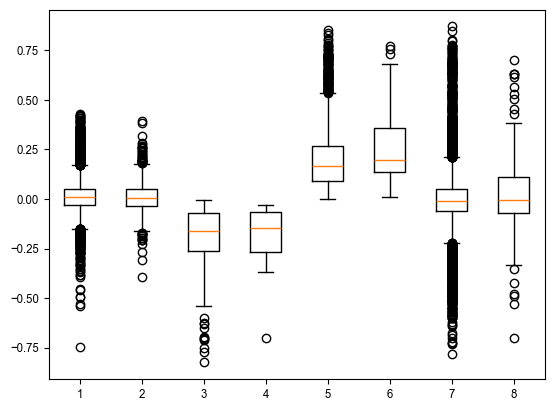

In [13]:
AA = comps[(comps['WT-NUT-0h']>0) & (comps['WT-NUT-1h']>0)]
p53AA = AA[AA['is_functional']==True]

AB = comps[(comps['WT-NUT-0h']>0) & (comps['WT-NUT-1h']<0)]
p53AB = AB[AB['is_functional']==True]

BA = comps[(comps['WT-NUT-0h']<0) & (comps['WT-NUT-1h']>0)]
p53BA = BA[BA['is_functional']==True]

BB = comps[(comps['WT-NUT-0h']<0) & (comps['WT-NUT-1h']<0)]
p53BB = BB[BB['is_functional']==True]

bps = plt.boxplot([
    AA   ['WT-NUT-1h'] - AA   ['WT-NUT-0h'],
    p53AA['WT-NUT-1h'] - p53AA['WT-NUT-0h'],
    AB   ['WT-NUT-1h'] - AB   ['WT-NUT-0h'],
    p53AB['WT-NUT-1h'] - p53AB['WT-NUT-0h'],
    BA   ['WT-NUT-1h'] - BA   ['WT-NUT-0h'],
    p53BA['WT-NUT-1h'] - p53BA['WT-NUT-0h'],
    BB   ['WT-NUT-1h'] - BB   ['WT-NUT-0h'],
    p53BB['WT-NUT-1h'] - p53BB['WT-NUT-0h'],
])

In [14]:
print(stats.mannwhitneyu(AA   ['WT-NUT-1h'] - AA   ['WT-NUT-0h'],
                         p53AA['WT-NUT-1h'] - p53AA['WT-NUT-0h'], alternative='less'))
print(stats.mannwhitneyu(AB   ['WT-NUT-1h'] - AB   ['WT-NUT-0h'],
                         p53AB['WT-NUT-1h'] - p53AB['WT-NUT-0h'], alternative='less'))
print(stats.mannwhitneyu(BA   ['WT-NUT-1h'] - BA   ['WT-NUT-0h'],
                         p53BA['WT-NUT-1h'] - p53BA['WT-NUT-0h'], alternative='less'))
print(stats.mannwhitneyu(BB   ['WT-NUT-1h'] - BB   ['WT-NUT-0h'],
                         p53BB['WT-NUT-1h'] - p53BB['WT-NUT-0h'], alternative='less'))

MannwhitneyuResult(statistic=13817063.5, pvalue=0.9796462705684957)
MannwhitneyuResult(statistic=1401.5, pvalue=0.43315506766095346)
MannwhitneyuResult(statistic=31563.0, pvalue=0.005412668014678282)
MannwhitneyuResult(statistic=1026883.5, pvalue=0.05457613322761161)


In [15]:
len(AA), len(p53AA), len(AB), len(p53AB), len(BA), len(p53BA), len(BB), len(p53BB)

(16050, 1671, 416, 7, 1156, 67, 10154, 216)

## Nut10h vs Nut 0h

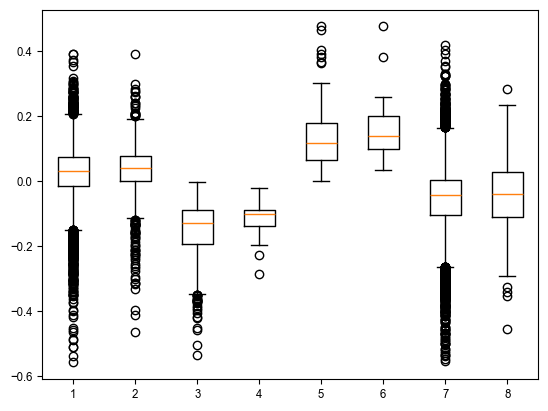

In [16]:
AA = comps[(comps['WT-NUT-0h']>0) & (comps['WT-NUT-10h']>0)]
p53AA = AA[AA['is_functional']==True]

AB = comps[(comps['WT-NUT-0h']>0) & (comps['WT-NUT-10h']<0)]
p53AB = AB[AB['is_functional']==True]

BA = comps[(comps['WT-NUT-0h']<0) & (comps['WT-NUT-10h']>0)]
p53BA = BA[BA['is_functional']==True]

BB = comps[(comps['WT-NUT-0h']<0) & (comps['WT-NUT-10h']<0)]
p53BB = BB[BB['is_functional']==True]

bps = plt.boxplot([
    AA   ['WT-NUT-10h'] - AA   ['WT-NUT-0h'],
    p53AA['WT-NUT-10h'] - p53AA['WT-NUT-0h'],
    AB   ['WT-NUT-10h'] - AB   ['WT-NUT-0h'],
    p53AB['WT-NUT-10h'] - p53AB['WT-NUT-0h'],
    BA   ['WT-NUT-10h'] - BA   ['WT-NUT-0h'],
    p53BA['WT-NUT-10h'] - p53BA['WT-NUT-0h'],
    BB   ['WT-NUT-10h'] - BB   ['WT-NUT-0h'],
    p53BB['WT-NUT-10h'] - p53BB['WT-NUT-0h'],
])

In [34]:
print(stats.mannwhitneyu(AA   ['WT-NUT-10h'] - AA   ['WT-NUT-0h'],
                         p53AA['WT-NUT-10h'] - p53AA['WT-NUT-0h'], alternative='less'))
print(stats.mannwhitneyu(AB   ['WT-NUT-10h'] - AB   ['WT-NUT-0h'],
                         p53AB['WT-NUT-10h'] - p53AB['WT-NUT-0h'], alternative='less'))
print(stats.mannwhitneyu(BA   ['WT-NUT-10h'] - BA   ['WT-NUT-0h'],
                         p53BA['WT-NUT-10h'] - p53BA['WT-NUT-0h'], alternative='less'))
print(stats.mannwhitneyu(BB   ['WT-NUT-10h'] - BB   ['WT-NUT-0h'],
                         p53BB['WT-NUT-10h'] - p53BB['WT-NUT-0h'], alternative='less'))

MannwhitneyuResult(statistic=11439701.5, pvalue=7.538227507769929e-07)
MannwhitneyuResult(statistic=24320.5, pvalue=0.0023083485487883954)
MannwhitneyuResult(statistic=1831.5, pvalue=0.04143140157897223)
MannwhitneyuResult(statistic=1351169.0, pvalue=0.045623698674960106)
